# Lab 3

Link del respositorio: https://github.com/faguilarleal/lab3_vision 

#### Integrantes:
 - Francis Aguilar
 - César Lopez
 - Jose Marchena

# Task 1
Usted deberá demostrar comprensión teórica del criterio de Harris sin usar librerías. Para ello considere lo
siguiente.
Se te da la siguiente Matriz del Segundo Momento (Tensor de Estructura) M calculada en un píxel
específico (u,v) de una imagen:
$$
M=\begin{bmatrix}
120 & 5\\
5 & 115
\end{bmatrix}
$$

Y una segunda matriz M’ para otro píxel diferente:

$$
M'=\begin{bmatrix}
200 & 10\\
10 & 1
\end{bmatrix}
$$



Con esta información haga lo siguiente:
1. Calcule manualmente (muestra tu procedimiento) los Eigenvalores (λ1, λ2) para ambas matrices.



In [16]:
import numpy as np

def get_eigenv_2x2(M):
     """
     lambdas: det[M - λ*I] = 0
     """
     # 1. Factores del polinomio caracteristico
     # M = |a - λ | b     |
     #     |c     | d - λ |
     # det(M) = (a-λ)(d-λ) - (c*b)
     # = a*d - aλ - dλ + λ^2 - cb
     # = λ^2 - (a+d)λ + (a*d - c*b)
     a = 1
     b = - (M[0][0] + M[1][1])
     c = (M[0][0]*M[1][1]) - (M[1][0]*M[0][1])

     # Cuadratic
     x1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
     x2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)
     return (x1, x2)


In [17]:

M = [[120,5],
     [5, 115]]

M_p = [[200,10],
           [10,1]]

eig_m = get_eigenv_2x2(M)
eig_mp = get_eigenv_2x2(M_p)

print(f"M eigenvalues = {eig_m}")
print(f"M' eigenvalues = {eig_mp}")

M eigenvalues = (np.float64(123.09016994374947), np.float64(111.90983005625053))
M' eigenvalues = (np.float64(200.50124999218758), np.float64(0.4987500078124043))


In [20]:
print(eig_m[0] * eig_m[1])

13775.0


2. Calcule la Respuesta de Harris (R) para ambas matrices usando la fórmula vista en clase. Asuma k = 0.04


In [18]:
def get_harris(eigenv, k=0.04):
    det = eigenv[0]*eigenv[1]
    trace = eigenv[0] + eigenv[1]
    R = det - k*(trace*trace)
    return R

In [19]:
m_R = get_harris(eig_m)
mp_R = get_harris(eig_mp)

print(f"Harry's solution para M: {m_R}")
print(f"Harry's solution para M': {mp_R}")

Harry's solution para M: 11566.0
Harry's solution para M': -1516.0399999999995


3. Basado en tus resultados numéricos, clasifica qué representa cada píxel geométricamente: ¿Es una Esquina, un Borde o una Región Plana? Justifica tu respuesta usando las definiciones de eigenvalores vistas en clase.

* M es esquina
Es esquina, en un primer lugar porque la solucion de harris muestra un numero grande y positivo. Con respcto a los eigenvalores 123 y 111 nos indican 2 direcciones distintas donde la tasa de cambio con los vecionos es de alta magnitud, lo que implica una interseccion de bordes, o esquina.

* M' es borde
Nuevamente, dado que la solucion de harris es grande y negativa, esto indica usualmente que el pixel es un borde. Observando los eigenvalores 200 y 0.4, esto indica una unica direccion donde la tasa de cambio con los vecinos es alta, esto refiere a una cierta continuidad con el cambio de valor entre pixeles, es decir, un borde.

# Task 2

<!-- En esta parte se busca que usted implemente un sistema de correspondencia completo. Para esto debe -->
escribir un script en Python usando OpenCV. No se provee código base, debe estructurarlo usted mismx.
Para esta parte debe crear su propia imagen a usar para esto:
• Tome dos fotografías propias de un objeto con textura (i.e. una caja de cereral, una portada de
libro, un edificio)
• Foto 1: Vista frontal
• Foto 2: Vista rotada (aproximadamente 45 grados) y con cambio de escala (aléjese o haga zoom).
El cambio debe ser evidente
Con esto haga lo siguiente en su código
1. Cargue ambas imágenes en escala de grises
2. Implemente la detección y descripción usando SIFT.
3. Implemente la detección y descripción usando ORB.

In [ ]:
import cv2
import numpy as np

# cargar las imagenes :p
ruta_img1 = "./imagen_normal.jpeg"
ruta_img2 = "./imagen_rotada.jpeg"

img1 = cv2.imread(ruta_img1)
img2 = cv2.imread(ruta_img2)

# esto es para la escala de grises 
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [ ]:
sift = cv2.SIFT_create() 

kp1_sift, des1_sift = sift.detectAndCompute(img1_gray, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2_gray, None)

print("SIFT")
print("Imagen 1 - Keypoints:", len(kp1_sift))
print("Imagen 2 - Keypoints:", len(kp2_sift))
print("Descriptor img1:", des1_sift.shape if des1_sift is not None else None)
print("Descriptor img2:", des2_sift.shape if des2_sift is not None else None)


SIFT
Imagen 1 - Keypoints: 4732
Imagen 2 - Keypoints: 29643
Descriptor img1: (4732, 128)
Descriptor img2: (29643, 128)


In [4]:
orb = cv2.ORB_create(nfeatures=5000)

kp1_orb, des1_orb = orb.detectAndCompute(img1_gray, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2_gray, None)

print("ORB")
print("Imagen 1 - Keypoints:", len(kp1_orb))
print("Imagen 2 - Keypoints:", len(kp2_orb))
print("Descriptor img1:", des1_orb.shape if des1_orb is not None else None)
print("Descriptor img2:", des2_orb.shape if des2_orb is not None else None)


ORB
Imagen 1 - Keypoints: 5000
Imagen 2 - Keypoints: 5000
Descriptor img1: (5000, 32)
Descriptor img2: (5000, 32)


In [5]:
# BFMatcher para SIFT (norma L2)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# KNN matching (k=2 para Lowe)
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

# Lowe's Ratio Test
good_matches_sift = []
ratio_thresh = 0.75

for m, n in matches_sift:
    if m.distance < ratio_thresh * n.distance:
        good_matches_sift.append(m)

print("SIFT Matching")
print("Matches totales:", len(matches_sift))
print("Good matches:", len(good_matches_sift))


SIFT Matching
Matches totales: 4732
Good matches: 1146


In [6]:
# BFMatcher para ORB (norma Hamming)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# KNN matching
matches_orb = bf_orb.knnMatch(des1_orb, des2_orb, k=2)

# Lowe's Ratio Test
good_matches_orb = []

for m, n in matches_orb:
    if m.distance < ratio_thresh * n.distance:
        good_matches_orb.append(m)

print("ORB Matching")
print("Matches totales:", len(matches_orb))
print("Good matches:", len(good_matches_orb))


ORB Matching
Matches totales: 5000
Good matches: 949


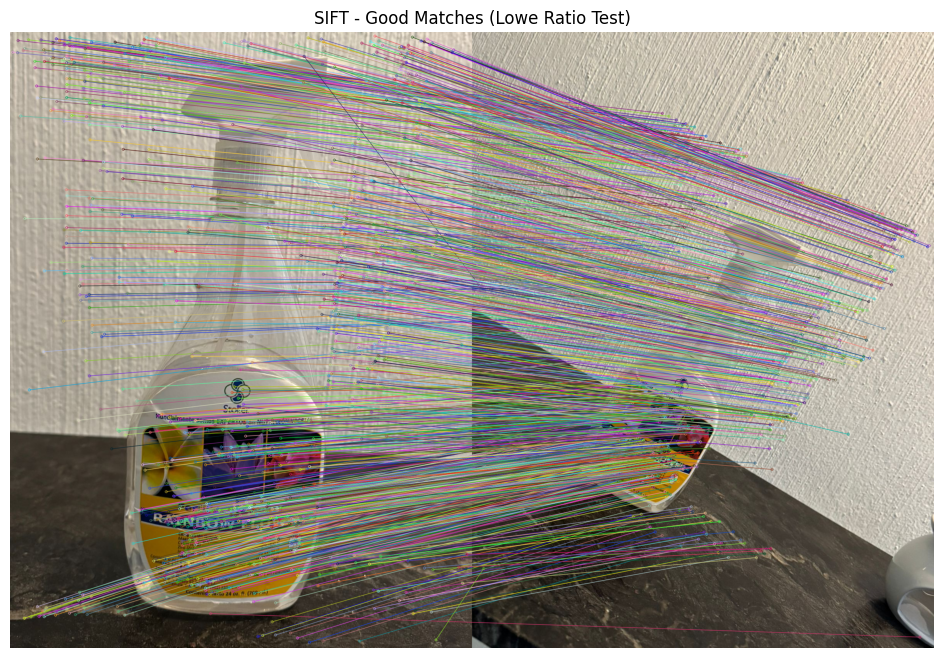

In [7]:
img_matches_sift = cv2.drawMatches(
    img1,
    kp1_sift,
    img2,
    kp2_sift,
    good_matches_sift,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Mostrar en Jupyter
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
plt.title("SIFT - Good Matches (Lowe Ratio Test)")
plt.axis("off")
plt.show()


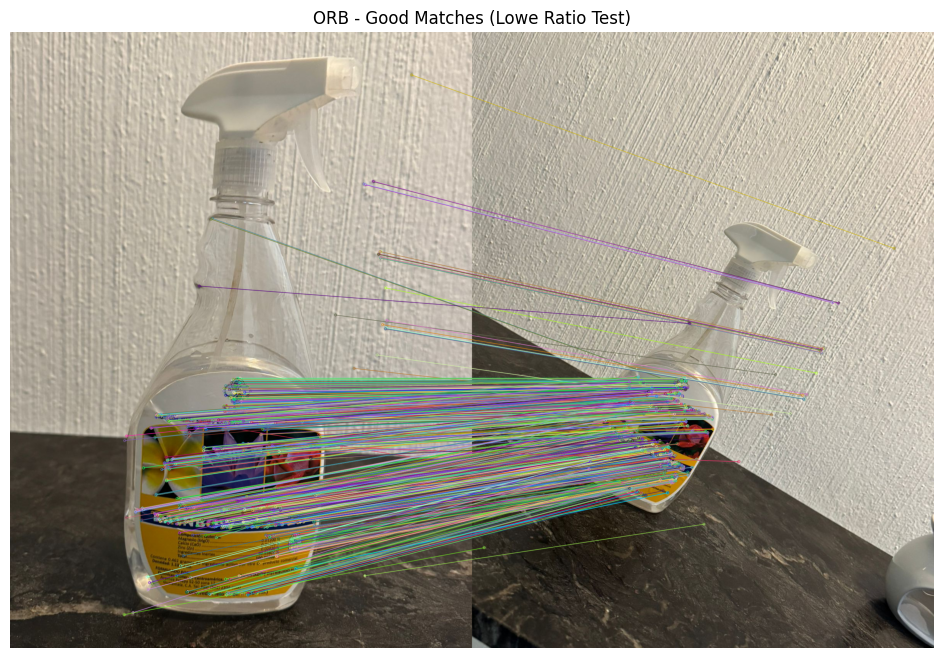

In [8]:
img_matches_orb = cv2.drawMatches(
    img1,
    kp1_orb,
    img2,
    kp2_orb,
    good_matches_orb,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
plt.title("ORB - Good Matches (Lowe Ratio Test)")
plt.axis("off")
plt.show()
